### Importing the required libraries and packages

In [2]:
import os
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [6]:
sales_data = pd.read_csv('Champagne Sales.csv')
sales_data['Month'] = pd.to_datetime(sales_data['Month'])

#Here are we are setting the index of the dataframe to the variable
sales_data.set_index('Month', inplace = True)
sales_data

,Champagne sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


### Plotting the dataset

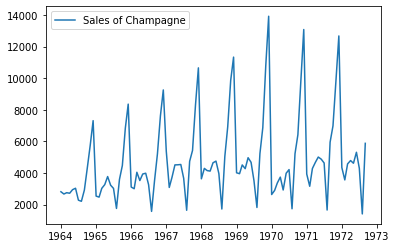

In [22]:
plt.plot(sales_data['Champagne sales'], label = 'Sales of Champagne')
plt.legend(loc='best')
plt.show()

### Splitting the dataset into Training Data and Test Data

In [20]:
train_data = sales_data.iloc[0:85]
test_data = sales_data.iloc[-20:]

### Fitting a Simple Exponential Smoothing without specifying smooth parameter

In [8]:
fitx = SimpleExpSmoothing(np.asarray(train_data['Champagne sales'])).fit(optimized=True)
print('optimal alpha chosen:', fitx.model.params['smoothing_level'])

optimal alpha chosen: 0.06302396257444798


### Fitting a Simple Exponential Smoohing with explicitly supplied smooth parameter

In [9]:
fit2 = SimpleExpSmoothing(np.asarray(train_data['Champagne sales'])).fit(smoothing_level=0.4, optimized=False)

### RMSE of training data

In [10]:
#Without specifying smooth parameter
rms_train_opt = sqrt(mean_squared_error(train_data['Champagne sales'], fitx.fittedvalues)) 
print('rmse for fitted values with optimal alpha: ', rms_train_opt)

#With specifying smooth parameter
rms_train = sqrt(mean_squared_error(train_data['Champagne sales'], fit2.fittedvalues)) 
print('rmse for fitted values with supplied alpha: ', rms_train)

rmse for fitted values with optimal alpha:  2517.485445926527
rmse for fitted values with supplied alpha:  2591.0176732068244


### Forecasting Using Both the models

In [17]:
test_data['SES_opt_fcast'] = fitx.forecast(len(test_data))
test_data['SES_fcast'] = fit2.forecast(len(test_data))

In [18]:
#Displaying the forecasted values
test_data

,Champagne sales,SES_opt_fcast,SES_fcast
Month,,,
1971-02-01,3162,5595.44129,7194.663601
1971-03-01,4286,5595.44129,7194.663601
1971-04-01,4676,5595.44129,7194.663601
1971-05-01,5010,5595.44129,7194.663601
1971-06-01,4874,5595.44129,7194.663601
1971-07-01,4633,5595.44129,7194.663601
1971-08-01,1659,5595.44129,7194.663601
1971-09-01,5951,5595.44129,7194.663601
1971-10-01,6981,5595.44129,7194.663601


### Plotting the time series as train, test and forecast

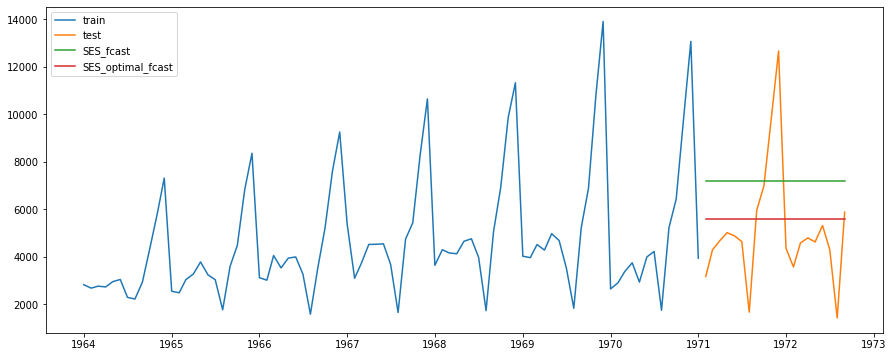

In [19]:
plt.figure(figsize=(15,6))
plt.plot(train_data['Champagne sales'], label='train')
plt.plot(test_data['Champagne sales'], label='test')
plt.plot(test_data['SES_fcast'], label='SES_fcast')
plt.plot(test_data['SES_opt_fcast'], label='SES_optimal_fcast')
plt.legend(loc='best')
plt.show()

### Calculating the RMSE of the forecast on Test Data

In [13]:
rms = sqrt(mean_squared_error(test_data['Champagne sales'], y_hat.SES_fcast)) 
print('rmse for model with supplied alpha: ', rms)


rms_opt = sqrt(mean_squared_error(test_data['Champagne sales'], y_hat.SES_opt_fcast)) 
print('rmse for model with optimal alpha: ', rms_opt)

rmse for model with supplied alpha:  3199.4189215908405
rmse for model with optimal alpha:  2486.3156052155236


# Forecasting Using  Moving Average Model

In [39]:
#funtion rolling
sales_data['moving_Average'] = sales_data['Champagne sales'].rolling(window=20).mean().shift(1)

In [40]:
#to display values upto 2 decimals%
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [41]:
sales_data

,Champagne sales,moving_Average
Month,,
1964-01-01,2815,nan
1964-02-01,2672,nan
1964-03-01,2755,nan
1964-04-01,2721,nan
1964-05-01,2946,nan
...,...,...
1972-05-01,4618,5976.35
1972-06-01,5312,5946.20
1972-07-01,4298,5890.60


**Since we have kept the rolling window value as 20, the moving average starts from the 20th value of the dataset**

### Plotting the dataset and Moving Average model together

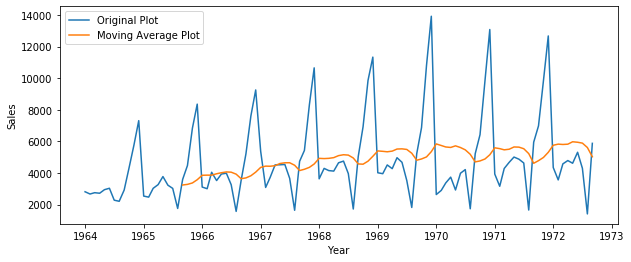

In [45]:
plt.figure(figsize = (10,4))
plt.xlabel("Year")
plt.ylabel('Sales')
plt.plot(sales_data['Champagne sales'], label = 'Original Plot')
plt.plot(sales_data['moving_Average'],'-', label = 'Moving Average Plot')
plt.legend(loc = 'best')
plt.show()